**Introduction**

This is an example of using the Ordinary Least Squares (OLS) model called LinearRegression in scikot-learn. 
We use a single feature from the diabetes dataset and try to predict the diabetes progression using this linear model. 

**Data Loading and Preparation**



In [ ]:
#Loading the diabetes dataset and keeping a single feature in the data

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y= True)

#Using only the feature in the third column
X = X[:, [2]]

#Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 20, shuffle = False) #shuffle = True is the default generally used for non-temporal data


**Linear Regression Model**

Creating a linear regression model and fitting it on the training data. An intercept is added to the model by default.This behavior can be controlled by setting the fit_intercept parameter (fit_intercept = False). 

In [32]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

**Model Evaluation**

Evaluating the model's performance on the test set using the MSE(lower the better) and the coefficient of determination(R-squared)(how well the model explains the variance(variation around the mean) in the target variable - higher the better). 



In [37]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of Determination: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 2548.07
Coefficient of Determination: 0.47


**Plotting the results**

Visualizing the results on the train and test data. 

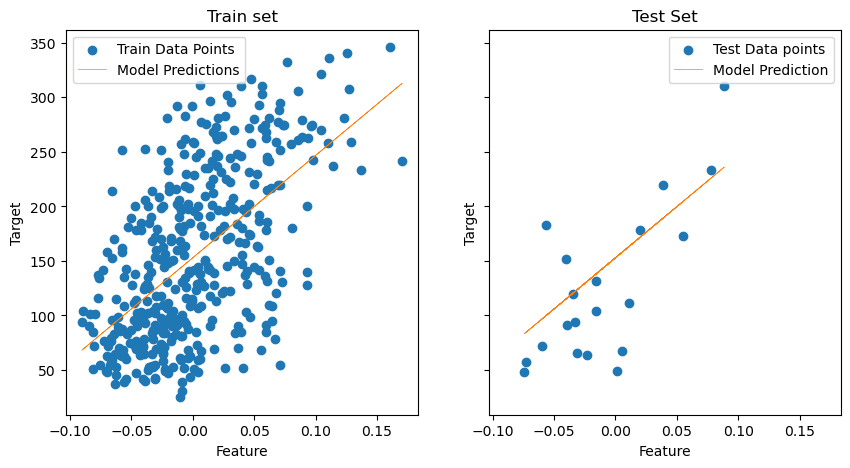

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 2, figsize = (10,5), sharex = True, sharey = True)

#Creating the scatter plot in the first column plotting the training data points
ax[0].scatter(X_train, y_train, label = 'Train Data Points')

#Creating a line plot using the trained input features and the predicted target values
ax[0].plot(X_train, regressor.predict(X_train), linewidth = 0.5, color = 'tab:orange', label = 'Model Predictions')

#Labeling the X and Y axes and setting a title
ax[0].set(xlabel = 'Feature', ylabel = 'Target', title = 'Train set')
ax[0].legend()
#Repeating the procedure for the test and predicted data points in the second column

ax[1].scatter(X_test, y_test, label = 'Test Data points')
ax[1].plot(X_test, regressor.predict(X_test), linewidth = 0.5, color = 'tab:orange', label = 'Model Prediction')
ax[1].set(xlabel = 'Feature', ylabel = 'Target', title = 'Test Set')
ax[1].legend()

**Conclusion**

The trained model corresponds to an algorithm that minimizes the mean squared error between the predicted and the true target values. In other words, we get an estimator of the conditional mean of the target values given the data points. 

However, in higher dimensions, solely focusing on minimizing the squared errors might lead to overfitting. . Therefore, regularization techniques , such as Lasso or Ridge, are used to prevent this issue. 